# 단순선형회귀

In [14]:
import sys
sys.path.append('../../')
import helper

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

1. 데이터 셋 준비하기

In [8]:
origin = read_excel('https://data.hossam.kr/E04/cars.xlsx')
origin.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


2. 데이터 전처리

In [9]:
# 결측치 확인
origin.isna().sum() 

speed    0
dist     0
dtype: int64

3. 탐색적 데이터 분석

In [10]:
# 기본 통계 확인
origin.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


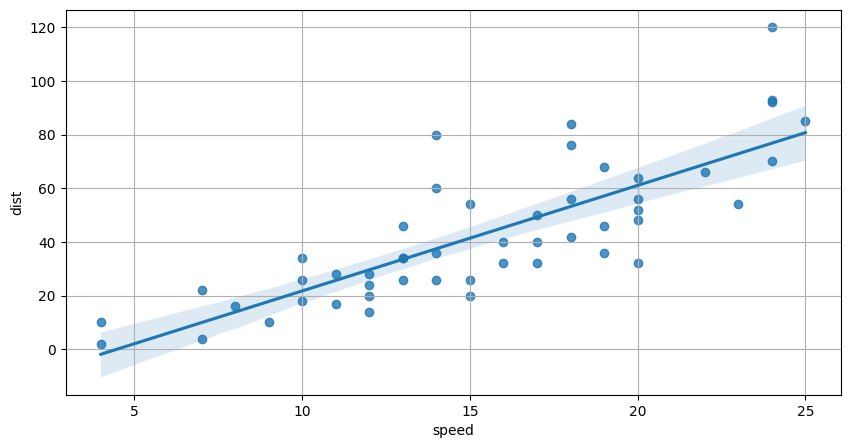

In [11]:
# 산점도 그래프와 추세선 확인 
# 산점도를 그리는 이유는 직선이면 단순 선형/곡선이면 다항식을 쓰기 위해서.(=차수를 결정하기 위해서)

plt.figure(figsize=(10,5))
sb.regplot(data=origin,x='speed',y='dist')
plt.grid()
plt.show()
plt.close()

> 그래프 해석 : 곡선보다는 선형분포에 가까우므로 단순선형회귀모델을 적용하기로 함

4. 데이터셋 분할하기

In [18]:
# 1. 랜덤 시드 고정
np.random.seed(777)

# 2. 훈련데이터(독립변수)와 레이블(종속변수) 구분하기
x = origin.drop(['dist'],axis = 1)
y = origin['dist'] # y = origin['dist'] # 시리즈 형태
print('훈련데이터 크기:',x.shape,'레이블 크기:',y.shape) 

# 3. 훈련데이터와 검증데이터로 분할
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=777)
print('훈련용 데이터셋 크기 :',len(x_train),'검증용 데이터셋 크기 :',len(x_test))

훈련데이터 크기: (50, 1) 레이블 크기: (50,)
훈련용 데이터셋 크기 : 35 검증용 데이터셋 크기 : 15


5. 모델 개발

In [21]:
# 1. 모델 정의 
# Sequential 함수를 사용하여 모델을 생성할 때에는 한 개의 입력과 한 개의 출력이 있는 경우 각 층을 선형적으로 실행할 경우에 적합하다. 입력이나 출력이 여러개이고 은닉층을 공유하거나 분기할 경우에는 Sequential 모델이 적합하지 않다. 
model = Sequential()
# 1차원의 데이터를 입력으로 받고 32개의 출력을 가지는 첫번째 Dense층
# Dense(은닉층 노드의 개수)
# Dense 함수는 은닉층과 출력층을 생성하는 역할을 하며 ()안에는 은닉층 노드의 개수, activation 활성화 함수 명을 작성함으로써 은닉층 노드의 개수와 활성화 함수를 설정한다. 분류 모델에서는 렐루, 출력층의 활성화 함수는 소프트 맥스를 사용한다. 
# 노드의 개수가 너무 많으면 훈련 데이터에 과적합이 발생할 수 있다. 
model.add(Dense(32,activation='relu',input_shape=(1,))) # input_shape 하나의 값을 출력 
# 정답의 범위가 정해지지 않았으므로 활성화함수는 linear (linear는 디폴트라서 생략 가능)
model.add(Dense(1,activation='linear'))

model.compile(optimizer = 'adam', loss = 'mse', metrics=['mae'])
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                64        
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# 학습하기 

result = model.fit(x_train,y_train,epochs=300,validation_data=(x_test,y_test))

# 학습결과
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1 
result_df.set_index('epochs',inplace=True)
result_df

Epoch 1/300
2/2 [==============================] - 1s 134ms/step - loss: 2658.7642 - mae: 44.1659 - val_loss: 1853.1864 - val_mae: 37.4636
Epoch 2/300
2/2 [==============================] - 0s 23ms/step - loss: 2639.7893 - mae: 43.9869 - val_loss: 1840.1873 - val_mae: 37.3093
Epoch 3/300
2/2 [==============================] - 0s 27ms/step - loss: 2623.2732 - mae: 43.8192 - val_loss: 1827.6821 - val_mae: 37.1603
Epoch 4/300
2/2 [==============================] - 0s 27ms/step - loss: 2606.2117 - mae: 43.6511 - val_loss: 1815.2781 - val_mae: 37.0119
Epoch 5/300
2/2 [==============================] - 0s 24ms/step - loss: 2588.9778 - mae: 43.4849 - val_loss: 1802.7252 - val_mae: 36.8612
Epoch 6/300
2/2 [==============================] - 0s 24ms/step - loss: 2572.0664 - mae: 43.3169 - val_loss: 1790.0012 - val_mae: 36.7078
Epoch 7/300
2/2 [==============================] - 0s 44ms/step - loss: 2555.7861 - mae: 43.1494 - val_loss: 1777.5994 - val_mae: 36.5576
Epoch 8/300
2/2 [================

,loss,mae,val_loss,val_mae
epochs,,,,
1,2658.764160,44.165901,1853.186401,37.463615
2,2639.789307,43.986877,1840.187256,37.309341
3,2623.273193,43.819221,1827.682129,37.160328
4,2606.211670,43.651073,1815.278076,37.011944
5,2588.977783,43.484890,1802.725220,36.861183
...,...,...,...,...
296,274.381744,13.045098,249.342255,12.931149
297,274.373291,13.044290,249.429550,12.938226
298,274.339233,13.043628,249.596909,12.951493


6. 학습결과 평가


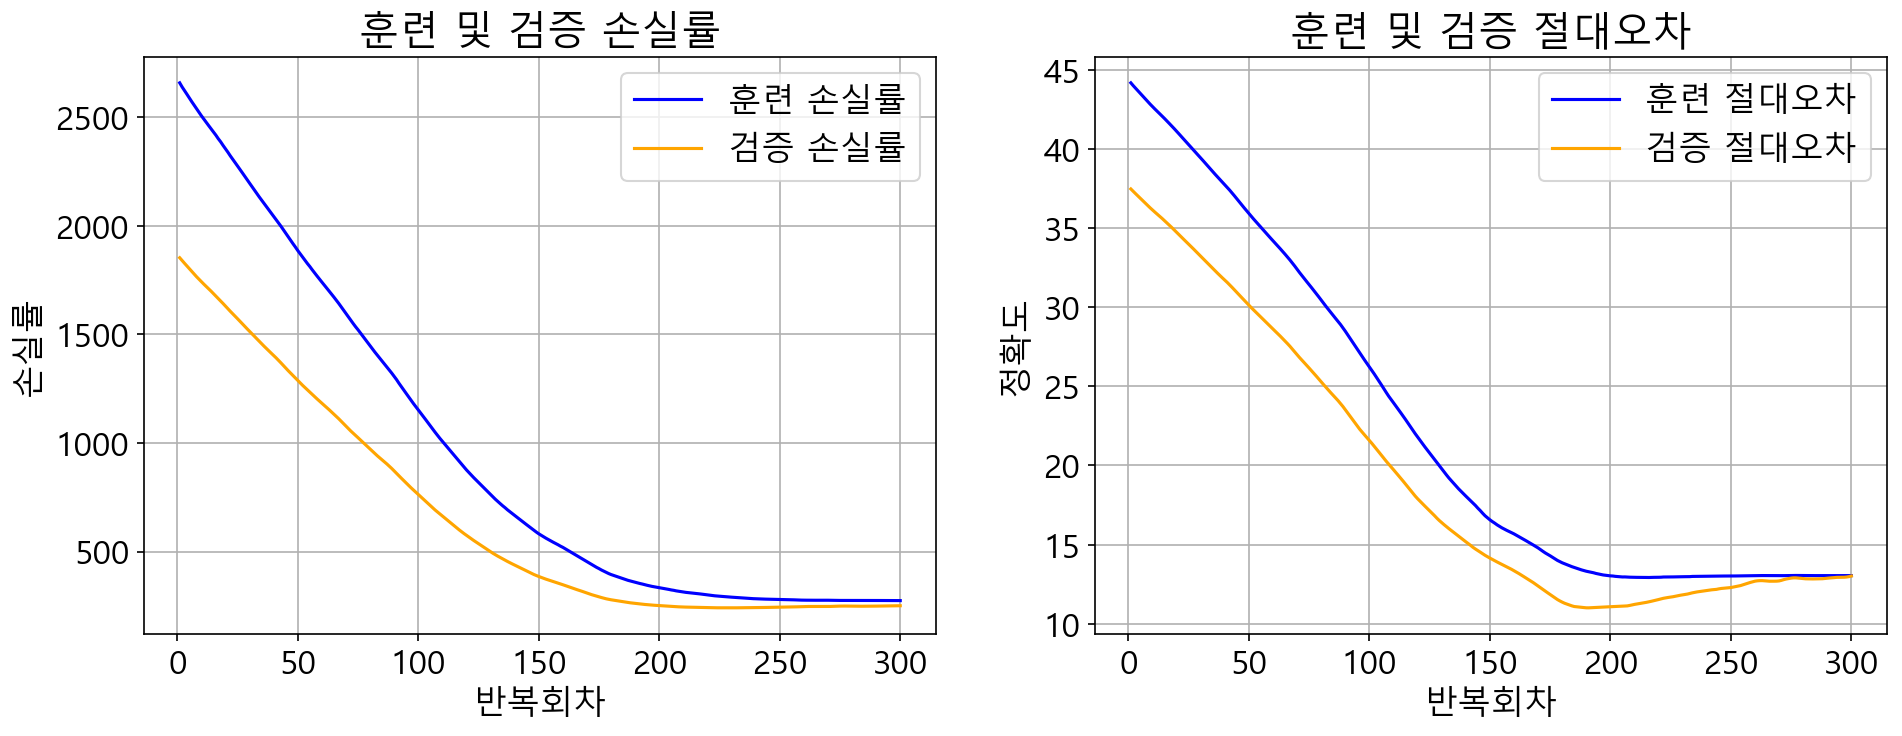

In [23]:
# 시각화
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sb.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='mae', data=result_df, color = 'blue', label = '훈련 절대오차', ax=ax2)
sb.lineplot(x=result_df.index, y='val_mae', data=result_df, color = 'orange', label = '검증 절대오차', ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()



훈련 손실률와 검증 손실률을 확인해야 함..
이 그래프 해석 : 훈련 데이터 손실률이 크고 검증이 적었는데, 학습하다보니 그 차이가 없어졌다. -> 가장 이상적. 오차도 거의 없어졌다 -> 이게 가장 좋은거 (<-> 벌어지면 과적합 -> 데이터를 더 넣거나 표준화를 해라.) 

2. 모델 성능 평가

In [25]:
evaluate1 = model.evaluate(x_train,y_train)
print('최종 훈련 손실률',evaluate1[0],'최종 훈련 절대 오차',evaluate1[1])
evaluate2 = model.evaluate(x_test,y_test)
print('최종 훈련 손실률',evaluate2[0],'최종 훈련 절대 오차',evaluate2[1])


2/2 [==============================] - 0s 3ms/step - loss: 274.1140 - mae: 13.0492
최종 훈련 손실률 274.1140441894531 최종 훈련 절대 오차 13.049234390258789
1/1 [==============================] - 0s 19ms/step - loss: 250.4689 - mae: 13.0181
최종 훈련 손실률 250.46893310546875 최종 훈련 절대 오차 13.018092155456543


7. 학습 결과 적용

In [28]:
# 1. 테스트 데이터에 대한 예측 결과 산정
result = model.predict(x_test)
print(result)

1/1 [==============================] - 0s 20ms/step
[[66.89389 ]
 [38.68213 ]
 [35.86096 ]
 [33.039776]
 [55.60919 ]
 [41.503307]
 [41.503307]
 [52.788013]
 [35.86096 ]
 [55.60919 ]
 [41.503307]
 [58.430363]
 [21.755074]
 [38.68213 ]
 [13.291543]]


In [30]:
# 2. 결과 데이터 셋 구성
kdf = DataFrame({
    '검증데이터': x_test['speed'],
    '실제값': y_test,
    '예측값' : result.flatten()
})

kdf['예측오차'] = kdf['실제값']-kdf['예측값']

kdf

,검증데이터,실제값,예측값,예측오차
44,23,54,66.893890,-12.893890
17,13,34,38.682129,-4.682129
11,12,14,35.860958,-21.860958
9,11,17,33.039776,-16.039776
36,19,46,55.609192,-9.609192
21,14,60,41.503307,18.496693
22,14,80,41.503307,38.496693
31,18,42,52.788013,-10.788013
12,12,20,35.860958,-15.860958
37,19,68,55.609192,12.390808


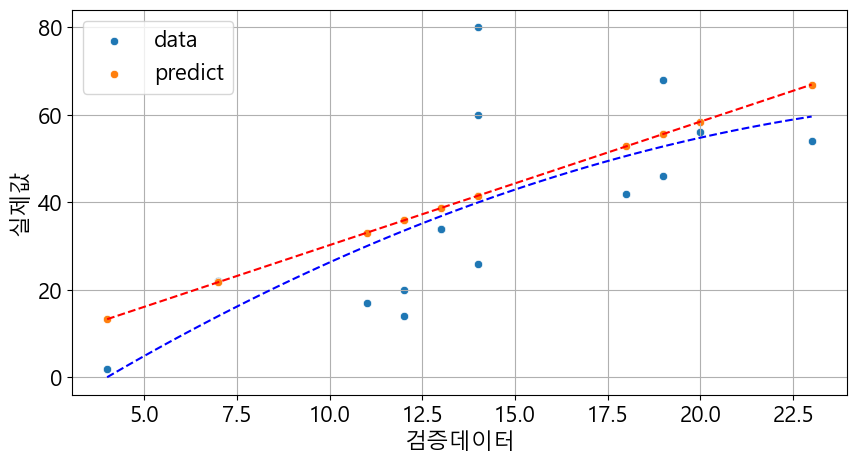

In [31]:
# 3. 실제 결과값과 머신러닝에 의한 예측값 비교

helper.regplot(x_left=kdf['검증데이터'],y_left=kdf['실제값'],y_left_pred=kdf['예측값'])


임의의 값에 대한 머신러닝 에측결과

In [32]:
my_speed = 50
results= model.predict([[my_speed]])
print('속도가 %d인 자동차의 제동거리는 %d로 예상된다' %(my_speed,results))

1/1 [==============================] - 0s 47ms/step
속도가 50인 자동차의 제동거리는 143로 예상된다
